<a href="https://colab.research.google.com/github/swathysathesh/credit-card/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection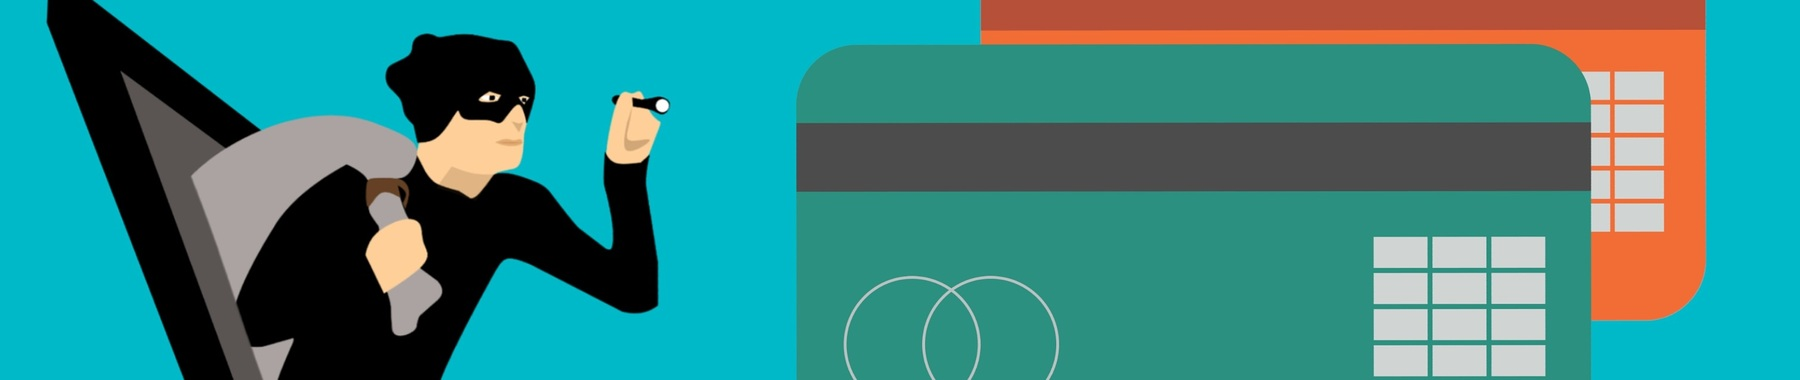**

#About dataset

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.


**trans_date_trans_time** : the transaction date and time of that customer

**cc_num :** the credit card number of each customer

**merchant :** A commercial entity or person authorized to accept cards and receive payments from its customers pursuant to agreement with the card brands.

**category :** type of category

**amt :** amount to be transfered in every transaction

**first :** first name of customer

**last :** last name of customer

**gender :** gender of card holder

**street :** address of card holder

**city :** city of card holder

**state :** state of card holder

**job :** designation of card holder

**dob :** date of birth of card holder

**trans_num :** transaction number

**is_fraud :** tells that transaction was fraud or not?

#**Importing Libraries and Loading Dataset**

Importing some packages pandas, NumPy, matplotlib, and seaborn for numerical computations,data preprocessing and data visualization.For doing operations, we have to read data by including a path into read_csv.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/fraudTest[1].csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/fraudTest[1].csv'

#**Dataset Overview**

If we want to see the first five rows of our data table we have to call the head() function.

In [ ]:
df.head()

If we want to see the last five rows of our data table we have to call the tail() function.


In [ ]:
df.tail()

To observe the total number of rows and columns in the table, we simply have to call shape.



In [ ]:
df.shape

we are going to check the total column list by calling columns

In [ ]:
df.columns

#**Dataset information**

In [ ]:
df.info()



**Columns:** The dataset contains 23 columns

**Data Types:**

12 coumns are of the object data type

6 columns are of the int64 data type, representing integer values.

5 columns are of the float64 data type, which typically denotes decimal values.

displaying description of the integer columns of a dataframe we have to call describe() function



In [ ]:
df.describe()

displaying description about the object columns in a table

In [ ]:
df.describe(include='O')

To observe the data types, we simply have to call dtypes

In [ ]:
df.dtypes

#To check missing values

For checking the null value available in our dataset we have to use the isna() function that means is the null value available And a sum function to do a summation of all the missing values in the dataset.

In [ ]:
df.isna().sum()

Check unique value for each variables

In [ ]:
df.nunique()

#Data preprocessing

In [ ]:
df.dropna(subset=['is_fraud'], inplace=True)

Dropping duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

drop unneccessary columns

In [ ]:
df.drop(['Unnamed: 0','zip','merch_lat','merch_long'],axis=1,inplace=True)

#Data visualization

# **Percentage of fraud or unfraud detection**

In [ ]:
plt.pie(df['is_fraud'].value_counts(),autopct='%1.2f%%',labels=['unfraud','fraud'])
plt.legend()

from above insight 99.61% is not fraud and remaining 0.39% is fraud.

#**Transactions based on category:**

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['category'],order=df['category'].value_counts().index,palette='bright')

highest transaction are in the category of "gas_transport" and "grocery_pos" and "home"
lowest transaction are in the category of "travel" and "grocery_net"

#**GENDER ANALYSIS:**

In [ ]:
sns.countplot(x='gender',hue='is_fraud',data=df)

most transactions are done by females compared by males


#Tranction in Week Days

In [ ]:
df["trans_date_trans_time"]=pd.to_datetime(df["trans_date_trans_time"])

In [ ]:
df["transaction_hour"]=df["trans_date_trans_time"].dt.hour ### extracting hour
df["transaction_day"]=df["trans_date_trans_time"].dt.day_name() ###extracting day
df["transaction_year_month"]=df["trans_date_trans_time"].dt.to_period("M")  ### extracting month and year

In [ ]:
plt.figure(figsize=(15,4.5))
df["transaction_day"].value_counts().plot(kind="bar")

more transaction are in "MONDAY" AND "TUESDAY"
less transaction apppears in "wednesday"

#Transaction in months

In [ ]:
plt.figure(figsize=(12,4.5))
df["transaction_year_month"].value_counts().plot(kind="bar")

Huge number of transactions are done in the 2020 august and december
less number of transactions are happens in the "2020 jun

#Transcation in Hour wise

In [ ]:
plt.figure(figsize=(12,4.5))
df["transaction_hour"].value_counts().plot(kind="bar")

huge transaction in the time of - night times
less ransaction are done in the time of *morning time

# **FRAUD TRANSACTION ANALYSIS:**

In [ ]:
fraud_df=df[df["is_fraud"]==1]             ## making two separate data frames for fraud and normal transactions
normal_df=df[df["is_fraud"]==0]
k1=fraud_df.groupby("transaction_year_month")["trans_num"].nunique()
k2=normal_df.groupby("transaction_year_month")["trans_num"].nunique()

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(15,9))
k1.plot(ax=axs[0])
k2.plot(ax=axs[1])
axs[0].set_title("FFRAUD TRNASACTION IN MONTH WISE")
axs[1].set_title("NORMAL TRANSACTION IN MONTH WISE")
plt.show()

# **FRAUD CUSTOMERS ANALYSIS:**

In [ ]:
k3=fraud_df.groupby("transaction_year_month")["cc_num"].nunique()
k4=normal_df.groupby("transaction_year_month")["cc_num"].nunique()


In [ ]:
fig,axs=plt.subplots(2,1,figsize=(15,9))
k3.plot(ax=axs[0])
k4.plot(ax=axs[1])
axs[0].set_title("FFRAUD CUSTOMERS IN MONTH WISE")
axs[1].set_title("NORMAL CUSTOMERS IN MONTH WISE")
plt.show()

#**merchant analysis:**

In [ ]:
abc=fraud_df.merchant.value_counts()
xaxis=abc.index[0:12]
yaxis=abc.values[0:12]
plt.figure(figsize=(15,5))
k=sns.barplot(x=xaxis,y=yaxis)
k.set_title("TOP 14 FRAUD MERCHNATS",fontsize=14)
k.set_xticklabels(k.get_xticklabels(),rotation=45,fontsize=14)
plt.show()

#**FRAUD ANALYSIS IN JOB WISE**:

In [ ]:
fraud_df.job.value_counts()
plt.figure(figsize=(15,6.5))
xaxis=fraud_df["job"].value_counts().index[0:10]
yaxis=fraud_df["job"].value_counts().values[0:10]
k=sns.barplot(x=xaxis,y=yaxis)
k.set_xticklabels(k.get_xticklabels(),rotation=45,fontsize=14)
k.set_title("TOP 10 DESIGNATIONS IN CREDIT CARD FRAUD",fontsize=16)
plt.show()

#**FRAUD ANALYSIS IN REGION WISE**:

In [ ]:
plt.figure(figsize=(15,6.5))
xaxis=fraud_df.state.value_counts().index[0:10]
yaxis=fraud_df.state.value_counts().values[0:10]
sns.barplot(x=xaxis,y=yaxis)
plt.title("TOP 10 STATES IN CREDIT CARD FRAUD",fontsize=14)
plt.show()

#**FRAUD ANALYSIS IN REGION WISE:**

In [ ]:
xaxis=fraud_df.city.value_counts().index[0:10]
yaxis=fraud_df.city.value_counts().values[0:10]
plt.figure(figsize=(18,5))
fig=sns.barplot(x=xaxis,y=yaxis)
fig.set_xticklabels(fig.get_xticklabels(),rotation=45,fontsize=14)
fig.set_title("TOP 10 CITIES IN CREDIT CARD FRAUD ")
plt.show()

#Heat map

In [ ]:
d1=df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(d1.corr(),annot=True)

In [ ]:
df.drop(['city_pop','first','last',],axis=1,inplace=True)

#Handling categorical values

converting categorical values to numerical values.label encode assigns a numerical value to each category.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['merchant']=lab.fit_transform(df['merchant'])
df['category']=lab.fit_transform(df['category'])
df['gender']=lab.fit_transform(df['gender'])
df['city']=lab.fit_transform(df['city'])
df['street']=lab.fit_transform(df['street'])
df['trans_num']=lab.fit_transform(df['trans_num'])
df['trans_date_trans_time']=lab.fit_transform(df['trans_date_trans_time'])
df['dob']=lab.fit_transform(df['dob'])
df['job']=lab.fit_transform(df['job'])
df['state']=lab.fit_transform(df['state'])
df['transaction_day']=lab.fit_transform(df['transaction_day'])

In [ ]:
df.dtypes

In [ ]:
#df['transaction_year_month']=df['transaction_year_month'].astype('int')

In [ ]:
x=df.drop(['is_fraud',],axis=1)
x

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,lat,long,job,dob,trans_num,unix_time,transaction_hour,transaction_day,transaction_year_month
0,0,2291163933867244,319,10,2.86,1,338,157,39,33.9659,-80.9355,275,369,7544,1.371817e+09,12,3,2020-06
1,1,3573030041201292,591,10,29.84,0,351,16,43,40.3207,-110.4360,391,750,8333,1.371817e+09,12,3,2020-06
2,2,3598215285024754,611,5,41.28,0,852,61,33,40.6729,-73.5365,259,411,33416,1.371817e+09,12,3,2020-06
3,3,3591919803438423,222,9,60.05,1,317,754,8,28.5697,-80.8191,406,708,5495,1.371817e+09,12,3,2020-06
4,4,3526826139003047,292,13,3.19,1,542,246,21,44.2529,-85.0170,196,175,14588,1.371817e+09,12,3,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42777,41970,2512312531485080,28,0,346.53,1,741,785,21,42.5164,-82.9832,341,191,36181,1.373088e+09,5,1,2020-07
42778,41971,375904527651269,162,2,55.90,1,711,659,28,40.4591,-98.5551,300,106,27961,1.373088e+09,5,1,2020-07
42779,41972,373905417449658,379,8,314.34,0,518,469,42,31.9290,-97.6443,327,413,42580,1.373088e+09,5,1,2020-07
42780,41973,4124536010991657,172,8,5.16,0,243,241,1,30.5012,-87.8835,334,164,3873,1.373088e+09,5,1,2020-07


In [ ]:
y=df['is_fraud']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42777    0.0
42778    0.0
42779    0.0
42780    0.0
42781    0.0
Name: is_fraud, Length: 42782, dtype: float64

#Balancing dataset

In [ ]:
y.value_counts()

is_fraud
0.0    42598
1.0      184
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)
y_resampled.value_counts()

TypeError: float() argument must be a string or a real number, not 'Period'

In [ ]:
x1=x_resampled.values
x1

In [ ]:
y1=y_resampled.values
y1

#Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

#Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

#Model creation

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

# perfomance evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

# perfomance evaluation

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

To make prediction the best model that can be used is Decision tree with accuracy score:0.99

